# Multiple Linear Regression

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Importing the dataset

In [2]:
Data = pd.read_csv('50_Startups.csv')

In [3]:
Data.head(5)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
Data.shape

(50, 5)

# Data Analysis

In [5]:
Data.duplicated().sum()

0

In [6]:
Data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [7]:
Data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [10]:
Data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


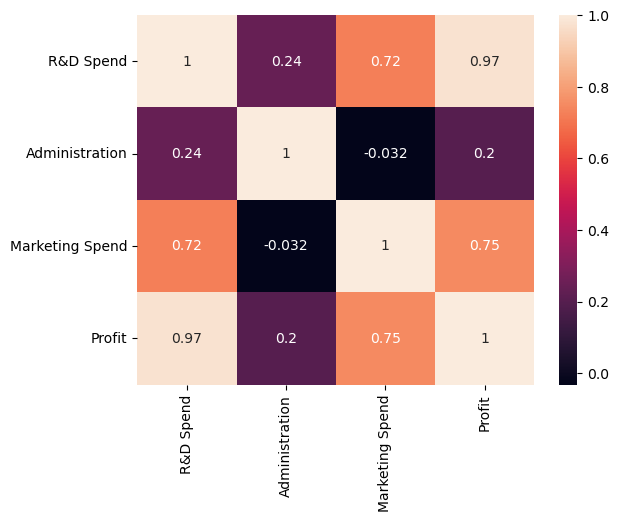

In [11]:
sns.heatmap(Data.corr() , annot=True )
plt.show()

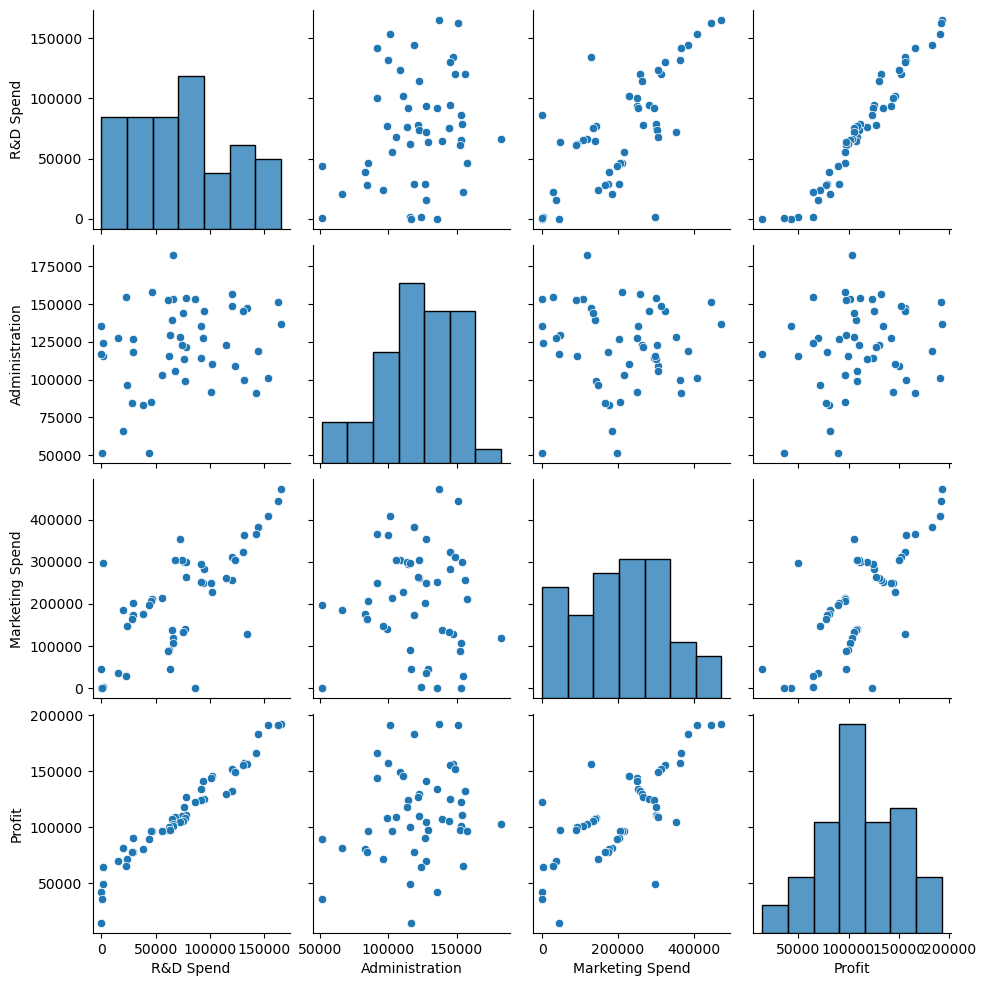

In [12]:
sns.pairplot(Data)
plt.show()

# Split the dataset to features and label

In [24]:
#x = Data.iloc[:,:4]
#y = Data.iloc[:,4:]
x = Data[['R&D Spend' , 'Administration' , 'Marketing Spend' , 'State' ]].values
y = Data[['Profit']].values
y

array([[192261.83],
       [191792.06],
       [191050.39],
       [182901.99],
       [166187.94],
       [156991.12],
       [156122.51],
       [155752.6 ],
       [152211.77],
       [149759.96],
       [146121.95],
       [144259.4 ],
       [141585.52],
       [134307.35],
       [132602.65],
       [129917.04],
       [126992.93],
       [125370.37],
       [124266.9 ],
       [122776.86],
       [118474.03],
       [111313.02],
       [110352.25],
       [108733.99],
       [108552.04],
       [107404.34],
       [105733.54],
       [105008.31],
       [103282.38],
       [101004.64],
       [ 99937.59],
       [ 97483.56],
       [ 97427.84],
       [ 96778.92],
       [ 96712.8 ],
       [ 96479.51],
       [ 90708.19],
       [ 89949.14],
       [ 81229.06],
       [ 81005.76],
       [ 78239.91],
       [ 77798.83],
       [ 71498.49],
       [ 69758.98],
       [ 65200.33],
       [ 64926.08],
       [ 49490.75],
       [ 42559.73],
       [ 35673.41],
       [ 14681.4 ]])

## Encoding categorical data

**change the state column to numerical**

In [19]:
Data['State'].value_counts()
#sns.countplot(data = Data , x = 'State' )

2    17
0    17
1    16
Name: State, dtype: int64

In [20]:
from sklearn.preprocessing import LabelEncoder
Encoding= LabelEncoder()
Data['State'] = Encoding.fit_transform(Data['State'])
Data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,2,192261.83
1,162597.70,151377.59,443898.53,0,191792.06
2,153441.51,101145.55,407934.54,1,191050.39
3,144372.41,118671.85,383199.62,2,182901.99
4,142107.34,91391.77,366168.42,1,166187.94


## Splitting the dataset into the Training set and Test set

don't forget the random state

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((37, 4), (13, 4), (37, 1), (13, 1))

## Training the Multiple Linear Regression model on the Training set

In [22]:
from sklearn.linear_model import LinearRegression
Model = LinearRegression()
Model.fit(X_train , y_train)

ValueError: could not convert string to float: 'New York'

## Predicting the Test set results

In [23]:
y_predict = Model.predict(X_test)
y_predict

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [61]:
df = pd.DataFrame({'Actual' : y_test.flatten() , 'Predicted' : y_predict.flatten()})
df

,Actual,Predicted
0,134307.35,126620.494939
1,81005.76,85683.545967
2,99937.59,98984.615033
3,64926.08,45931.259259
4,125370.37,128475.270260
5,35673.41,51982.194308
6,105733.54,108543.947356
7,107404.34,100621.097587
8,97427.84,97715.385238
9,122776.86,112397.517903


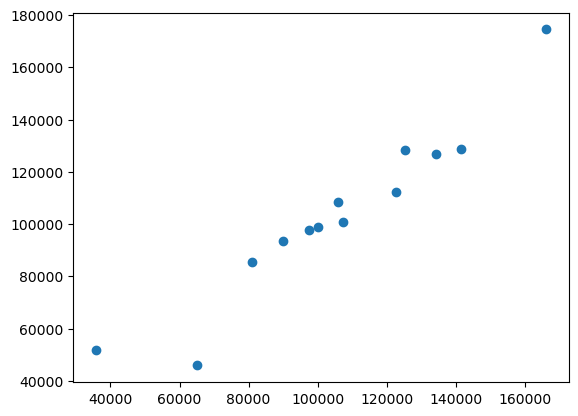

In [62]:
plt.scatter(y_test , y_predict)
plt.show()

# Evaluate the model

In [33]:
#pwd
from sklearn import metrics

In [63]:
MAE = metrics.mean_absolute_error(y_test , y_predict)
MAE

7455.852474936967

In [64]:
MSE = metrics.mean_squared_error(y_test , y_predict)
MSE

86953191.3002881

In [65]:
RMSE = np.sqrt(metrics.mean_squared_error(y_test ,y_predict))
RMSE

9324.86950580479